In [1]:
#dane początkowe

#dane początkowe(dp) dla każdej planety zgodnie z: [położenie początkowe po x,położenie początkowe po y, prędkość]
dp=[[723,0,234],[1000,0,200],[1520,0,160],[5200,0,120],[5600,0,92]]

5-element Vector{Vector{Int64}}:
 [723, 0, 234]
 [1000, 0, 200]
 [1520, 0, 160]
 [5200, 0, 120]
 [5600, 0, 92]

In [2]:
size(dp)

(5,)

In [3]:
#funkcja zwrazająca położenia planet po czasie t

function funkcja1(t)
    w=Float32[]
    
    #obliczamy prędkości kątowe dla każdej planety
    for i in 1:size(dp)[1]
        wv=dp[i][3]/sqrt((dp[i][1])^2+(dp[i][2])^2)
        push!(w,wv)
    end
    # w1=dp[1][3]/sqrt((dp[1][1])^2+(dp[1][2])^2)
    # w2=dp[2][3]/sqrt((dp[2][1])^2+(dp[2][2])^2)
    # w3=dp[3][3]/sqrt((dp[3][1])^2+(dp[3][2])^2)
    # w4=dp[4][3]/sqrt((dp[4][1])^2+(dp[4][2])^2)
    
    

    ϕ=Float32[] #tworzymy pustą listę dla kątów początkowych


    #wpisujemy kąt początkowy dla każdej z planet 
    for i in 1:size(dp)[1]
        if dp[i][1]>=0 | dp[i][2]>=0
            ϕy=atan(dp[i][2]/dp[i][1])
            push!(ϕ,ϕy)
        elseif dp[i][1]<0 | dp[i][2]<0
            ϕy=atan(dp[i][2]/dp[i][1])+π
            push!(ϕ,ϕy)
        elseif dp[i][1]<0 | dp[i][2]>=0
            ϕy=atan(dp[i][2]/dp[i][1])+π
            push!(ϕ,ϕy)
        elseif dp[i][1]>=0 | dp[i][2]<0
            ϕy=atan(dp[i][2]/dp[i][1])+2π
            push!(ϕ,ϕy)
        end

        
    end
    
    
    Δϕ=Float32[] #lista która określa zmiany w kącie od czasu

    for i in 1:size(dp)[1]
        x=w[i]*t
        push!(Δϕ,x)
    end

    ϕn=Float32[] #tworzymy pustą listę dla kątów w chwili t


    #wpisujemy kąty dla każdej planety w chwile t w listę
    for i in 1:size(dp)[1]
        y=ϕ[i]+Δϕ[i]
        push!(ϕn,y)
    end



    #robimy z kątów standardowy wygląd np. 7π to jest π w standardzie od [0,2π]
    for i in 1:size(dp)[1]
        while ϕn[i]>0
            ϕn[i]=ϕn[i]-2π
        end
        ϕn[i]=ϕn[i]+2π
    end

    

    position=Vector[] #tworzymy pustą listę dla położenia każdej planety w chwili t



    #obliczamy położenie każdej planety w chwili t
    for i in 1:size(dp)[1]
        poses=Float32[]
        positionx=cos(ϕn[i])*sqrt((dp[i][1])^2+(dp[i][2])^2)
        positiony=sin(ϕn[i])*sqrt((dp[i][1])^2+(dp[i][2])^2)
        push!(poses,positionx)
        push!(poses,positiony)

        push!(position,poses)
    end

    #zwracamy położenia
    return position
end   
funkcja1(10) 

5-element Vector{Vector}:
 Float32[-719.7453, -68.52553]
 Float32[-416.14673, 909.2975]
 Float32[752.83545, 1320.4691]
 Float32[5062.152, 1189.3787]
 Float32[5524.5986, 915.86584]

┌ Info: Saved animation to 
│   fn = c:\Users\User\Desktop\2 semestr\Pakiety matematyczne\Projekt\animacja1.gif
└ @ Plots C:\Users\User\.julia\packages\Plots\dNEbX\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\User\\Desktop\\2 semestr\\Pakiety matematyczne\\Projekt\\animacja1.gif")
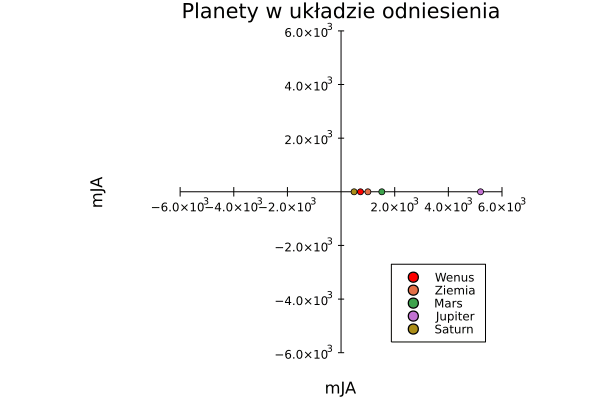

In [25]:
using Plots
gr()
name=["Ziemia","Mars","Jupiter","Saturn"]
a = @animate for t in LinRange(0,100,1000)
scatter([funkcja1(t)[1][1]],[funkcja1(t)[1][2]],
title = "Planety w układzie odniesienia",
ylabel="mJA", xlabel="mJA",  #mili Jednotki Astronomiczne
markersize = 4,
markercolor = :red,
xlim = (-6000,6000),
ylim = (-6000,6000),
grid = :off,
ratio = :equal,
framestyle = :origin,
label="Wenus",
legend= :bottomright
)
for i in 2:size(dp)[1]
    scatter!([funkcja1(t)[i][1]],[funkcja1(t)[i][2]],
    markersize = 4,
    xlim = (-6000,6000),
    ylim = (-6000,6000),
    grid = :off,
    ratio = :equal,
    framestyle = :origin,
    label=name[i-1]
    )
end

end

gif(a,"animacja1.gif",fps = 15)

In [4]:
#współrzędne każdej planety 



function funkcja2(t)

    proste=Vector[]

    #obliczamy wartości k i b dla każdej pary planet zgodnie z równaniem prostej: y = kx+b

    for i in 1:size(funkcja1(t))[1]-1
        znaczenia=Float32[]
        k=(funkcja1(t)[i][2]-funkcja1(t)[i+1][2])/(funkcja1(t)[i][1]-funkcja1(t)[i+1][1])
        b=funkcja1(t)[i][2]-k*funkcja1(t)[i][1]
        push!(znaczenia,k)
        push!(znaczenia,b)
        push!(proste,znaczenia)
    end

    ostznacz=Float32[]
    kost=(funkcja1(t)[size(funkcja1(t))[1]][2]-funkcja1(t)[1][2])/(funkcja1(t)[size(funkcja1(t))[1]][1]-funkcja1(t)[1][1])
    bost=funkcja1(t)[size(funkcja1(t))[1]][2]-kost*funkcja1(t)[size(funkcja1(t))[1]][1]
    push!(ostznacz,kost)
    push!(ostznacz,bost)
    push!(proste,ostznacz)
    
   
    
    
    return proste
end
funkcja2(10)

5-element Vector{Vector}:
 Float32[3.220776, 2249.6128]
 Float32[0.35173473, 1055.6708]
 Float32[-0.030420244, 1343.3706]
 Float32[-0.5914471, 4183.374]
 Float32[0.15764529, 44.938904]

┌ Info: Saved animation to 
│   fn = c:\Users\User\Desktop\2 semestr\Pakiety matematyczne\Projekt\animacja2.gif
└ @ Plots C:\Users\User\.julia\packages\Plots\dNEbX\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\User\\Desktop\\2 semestr\\Pakiety matematyczne\\Projekt\\animacja2.gif")
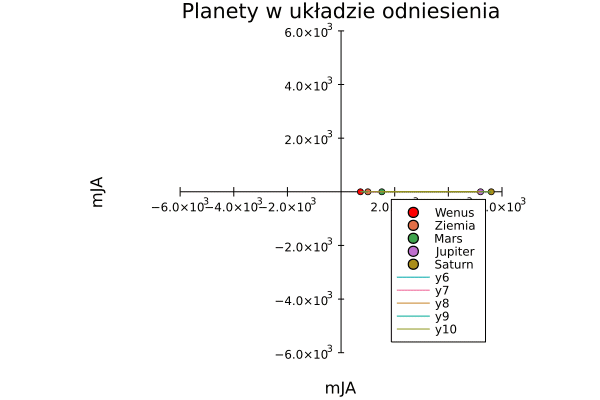

In [33]:
using Plots
gr()
name=["Ziemia","Mars","Jupiter","Saturn"]
a = @animate for t in LinRange(0,100,1000)
scatter([funkcja1(t)[1][1]],[funkcja1(t)[1][2]],
title = "Planety w układzie odniesienia",
ylabel="mJA", xlabel="mJA",  #mili Jednotki Astronomiczne
markersize = 4,
markercolor = :red,
xlim = (-6000,6000),
ylim = (-6000,6000),
grid = :off,
ratio = :equal,
framestyle = :origin,
label="Wenus",
legend= :bottomright
)
for i in 2:size(dp)[1]
        scatter!([funkcja1(t)[i][1]],[funkcja1(t)[i][2]],
        markersize = 4,
        xlim = (-6000,6000),
        ylim = (-6000,6000),
        grid = :off,
        ratio = :equal,
        framestyle = :origin,
        label=name[i-1]
        )
end

for i in 1:size(dp)[1]-1
plot!([funkcja1(t)[i][1],funkcja1(t)[i+1][1]],[funkcja1(t)[i][2],funkcja1(t)[i+1][2]],
xlim = (-6000,6000),
ylim = (-6000,6000),
        framestyle = :origin
)
end

plot!([funkcja1(t)[size(dp)[1]][1],funkcja1(t)[1][1]],[funkcja1(t)[size(dp)[1]][2],funkcja1(t)[1][2]],
xlim = (-6000,6000),
ylim = (-6000,6000),
        framestyle = :origin
)



end

gif(a,"animacja2.gif",fps = 15)

In [5]:
function koniunkcja(t)

    wspolczynniki = Float32[]

    for i in 1:3
        p = funkcja2(t)[i][1]
        push!(wspolczynniki,p)
    end
    
    n = 0
    
    for k in 1:2
        m = 0
        if wspolczynniki[k] <= wspolczynniki[k+1] + 0.12
            m += 1
        end
        if wspolczynniki[k] >= wspolczynniki[k+1] - 0.12
            m += 1
        end
        if m == 2
            n += 1
        end 
    end

    m = 0
    
    if wspolczynniki[1] <= wspolczynniki[3] + 0.12
        m += 1
    end
    if wspolczynniki[1] >= wspolczynniki[3] - 0.12
        m += 1
    end
    
    if m == 2
        n += 1
    end 
    
    if n == 3
        return 1
    else 
        return 0
    end
    
end
koniunkcja(10)

0

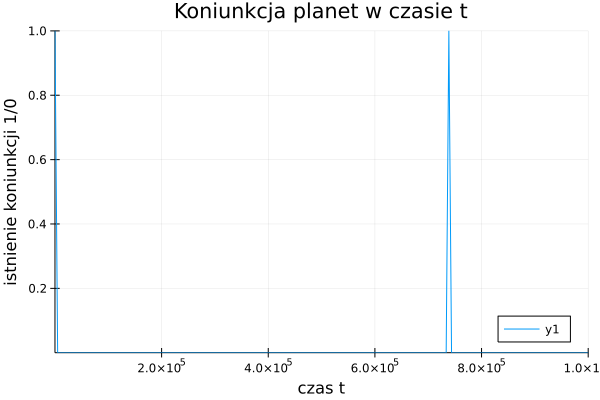

In [6]:
using Plots
t = LinRange(0,1000000,200)
plot(t,koniunkcja,
title="Koniunkcja planet w czasie t",
ylabel="istnienie koniunkcji 1/0", xlabel="czas t",
xlim=(0,1000000),
ylim=(0,1),
framestyle= :origin,
legend= :bottomright)

In [5]:
function funkcja3(t)
    
    kropki=funkcja1(t)
    proste=funkcja2(t)
    
    #współczyniki prostych
    a1=proste[1][1]
    b1=proste[1][2]
    a2=proste[2][1]
    b2=proste[2][2]
    a3=proste[3][1]
    b3=proste[3][2]
    a4=proste[4][1]
    b4=proste[4][2]
    
    #p
    p1=kropki[3][2]-(a1*kropki[3][1]+b1)
    p12=kropki[4][2]-(a1*kropki[4][1]+b1)
    p2=kropki[1][2]-(a2*kropki[1][1]+b2)
    p22=kropki[4][2]-(a2*kropki[4][1]+b2)
    p3=kropki[2][2]-(a3*kropki[2][1]+b3)
    p32=kropki[1][2]-(a3*kropki[1][1]+b3)
    p4=kropki[2][2]-(a4*kropki[2][1]+b4)
    p42=kropki[3][2]-(a4*kropki[3][1]+b4)
    
    l=[p1,p12,p2,p22,p3,p32,p4,p42]

    i=1
    while i<8
        if l[i]<0
            if l[i+1]>0
                return "niewypukły"
                break
            elseif l[i+1]==0
                return "to jest trójkąt"
                break
            end
        elseif l[i]>0
            if l[i+1]<0
                 return "niewypukły"
                break
            elseif l[i+1]==0
                return "to jest trójkąt"
                break
            end
        else 
            return "to jest trójkąt"
            break
    
        end
    i=i+2
    end
    return "wypukły"
end

funkcja3(80)

"wklęsły"

┌ Info: Saved animation to 
│   fn = c:\Users\User\Desktop\2 semestr\Pakiety matematyczne\Projekt\animacja3.gif
└ @ Plots C:\Users\User\.julia\packages\Plots\dNEbX\src\animation.jl:114


Plots.AnimatedGif("c:\\Users\\User\\Desktop\\2 semestr\\Pakiety matematyczne\\Projekt\\animacja3.gif")
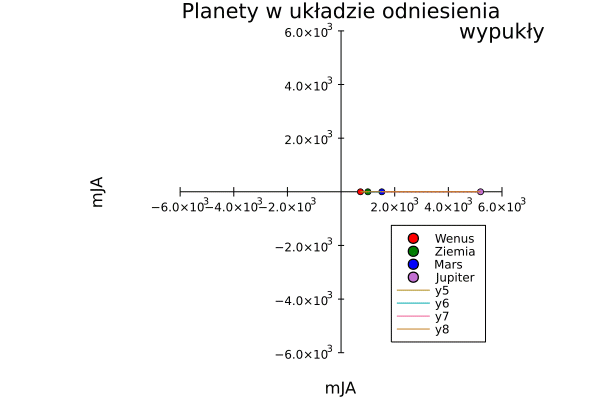

In [6]:
using Plots
gr()
a = @animate for t in LinRange(0,100,1000)
scatter([funkcja1(t)[1][1]],[funkcja1(t)[1][2]],
title = "Planety w układzie odniesienia",
ylabel="mJA", xlabel="mJA",  #mili Jednostki Astronomiczne
markersize = 4,
markercolor = :red,
xlim = (-6000,6000),
ylim = (-6000,6000),
grid = :off,
ratio = :equal,
framestyle = :origin,
label="Wenus",
legend= :bottomright
)
scatter!([funkcja1(t)[2][1]],[funkcja1(t)[2][2]],
markersize = 4,
markercolor = :green,
xlim = (-6000,6000),
ylim = (-6000,6000),
grid = :off,
ratio = :equal,
framestyle = :origin,
label="Ziemia"
)
scatter!([funkcja1(t)[3][1]],[funkcja1(t)[3][2]],
markersize = 4,
markercolor = :blue,
xlim = (-6000,6000),
ylim = (-6000,6000),
grid = :off,
ratio = :equal,
framestyle = :origin,
label="Mars"
)
scatter!([funkcja1(t)[4][1]],[funkcja1(t)[4][2]],
markersize = 4,
xlim = (-6000,6000),
ylim = (-6000,6000),
grid = :off,
ratio = :equal,
framestyle = :origin,
label="Jupiter"
)   
plot!([funkcja1(t)[1][1],funkcja1(t)[2][1]],[funkcja1(t)[1][2],funkcja1(t)[2][2]],
xlim = (-6000,6000),
ylim = (-6000,6000),
        framestyle = :origin
)
plot!([funkcja1(t)[2][1],funkcja1(t)[3][1]],[funkcja1(t)[2][2],funkcja1(t)[3][2]],
xlim = (-6000,6000),
ylim = (-6000,6000),
        framestyle = :origin
)
plot!([funkcja1(t)[3][1],funkcja1(t)[4][1]],[funkcja1(t)[3][2],funkcja1(t)[4][2]],
xlim = (-6000,6000),
ylim = (-6000,6000),
        framestyle = :origin
)

plot!([funkcja1(t)[4][1],funkcja1(t)[1][1]],[funkcja1(t)[4][2],funkcja1(t)[1][2]],
xlim = (-6000,6000),
ylim = (-6000,6000),
        framestyle = :origin
)
annotate!(5999,5999,text(funkcja3(t)))



end

gif(a,"animacja3.gif",fps = 15)